# Demo grids
Simple notebook to demonstrate plotting spectral element (SE) grids used in E3SM.

## Plot Exodus
Plot element faces from an exodus-format grid descriptor file. Need to have an appropriate grid file to run this. Using 'ne4.g' as an example, but you can generate any resolution you want using TempestRemap. This example depends on `xarray`, `matplotlib`, `cartopy`, and the separate `plot_exodus` script (in this repository).

Number of vertices: 98
Longitude range: -157 to 180
Latitude range: -90 to 90


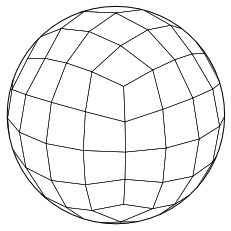

In [4]:
# Read data
import xarray as xr
exodus_grid_file = '/project/projectdirs/acme/bhillma/grids/ne4np4/descriptor_files/ne4.g'
ds_exodus = xr.open_dataset(exodus_grid_file)

# Plot data on an orthographic projection
from matplotlib import pyplot
from cartopy import crs
from plot_exodus import plot_exodus
figure, ax = pyplot.subplots(1, 1, subplot_kw=dict(projection=crs.Orthographic(central_longitude=40, central_latitude=20)))
pl = plot_exodus(ds_exodus, ax=ax, color='black', linewidth=0.5)

# Plot SCRIP
Plot the "dual-grid" (the finite volume representation of the spectral element grid) from a SCRIP-formatted file. The dual-grid shows the location of the individual Gauss-Lobatto-Legendre (GLL) nodes, and volumes drawn around them with area that approximates the weights of the GLL nodes.

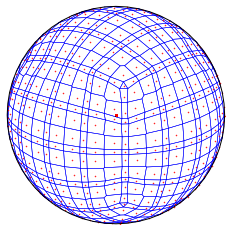

In [5]:
# Read data
import xarray as xr
scrip_grid_file = '/project/projectdirs/acme/mapping/grids/ne4np4-pentagons_c100308.nc'
ds_scrip = xr.open_dataset(scrip_grid_file)

# Plot on the same orthographic projection used above
from plot_scrip import plot_centers, plot_corners
from matplotlib import pyplot
from cartopy import crs
figure, ax = pyplot.subplots(1, 1, subplot_kw=dict(projection=crs.Orthographic(central_longitude=40, central_latitude=20)))
pl = plot_corners(ds_scrip, ax=ax, color='blue', linewidth=0.5)
pl = plot_centers(ds_scrip, ax=ax, color='red', marker='.', markersize=1)

# Plot Exodus and SCRIP together to illustrate dual-grid
Plot the exodus and SCRIP descriptions of the grid together to illustrate how the dual-grid relates to the native description of the grid:

Number of vertices: 98
Longitude range: -157 to 180
Latitude range: -90 to 90


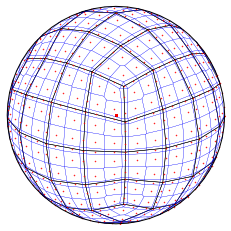

In [7]:
from plot_exodus import plot_exodus
figure, ax = pyplot.subplots(1, 1, subplot_kw=dict(projection=crs.Orthographic(central_longitude=40, central_latitude=20)))
pl = plot_exodus(ds_exodus, ax=ax, color='black', linewidth=0.5)
pl = plot_corners(ds_scrip, ax=ax, color='blue', linewidth=0.2)
pl = plot_centers(ds_scrip, ax=ax, color='red', marker='.', markersize=1)